Setup

First, let's import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures. We also check that Python 3.5 or later is installed (although Python 2.x may work, it is deprecated so we strongly recommend you use Python 3 instead), as well as Scikit-Learn ≥0.20 and TensorFlow ≥2.0.

In [2]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

try:
    # %tensorflow_version only exists in Colab.
    %tensorflow_version 2.x
except Exception:
    pass

# TensorFlow ≥2.0 is required
import tensorflow as tf
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "ann"
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

Perceptrons

Note: we set max_iter and tol explicitly to avoid warnings about the fact that their default value will change in future versions of Scikit-Learn.

In [2]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.linear_model import Perceptron


In [3]:
iris = load_iris()
X = iris.data[:, (2, 3)]  # petal length, petal width
y = (iris.target == 0).astype(np.int)

per_clf = Perceptron(max_iter=1000, tol=1e-3, random_state=42)
per_clf.fit(X, y)

y_pred = per_clf.predict([[2, 0.5]])

C:\Users\andre\AppData\Local\Temp/ipykernel_19064/4201270469.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  y = (iris.target == 0).astype(np.int)


In [4]:
y_pred

array([1])

Saving figure perceptron_iris_plot


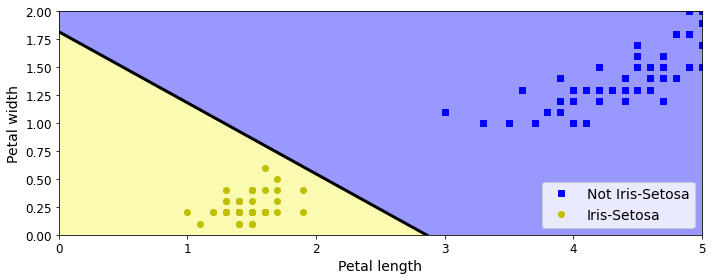

In [5]:
a = -per_clf.coef_[0][0] / per_clf.coef_[0][1]
b = -per_clf.intercept_ / per_clf.coef_[0][1]

axes = [0, 5, 0, 2]

x0, x1 = np.meshgrid(
        np.linspace(axes[0], axes[1], 500).reshape(-1, 1),
        np.linspace(axes[2], axes[3], 200).reshape(-1, 1),
    )
X_new = np.c_[x0.ravel(), x1.ravel()]
y_predict = per_clf.predict(X_new)
zz = y_predict.reshape(x0.shape)

plt.figure(figsize=(10, 4))
plt.plot(X[y==0, 0], X[y==0, 1], "bs", label="Not Iris-Setosa")
plt.plot(X[y==1, 0], X[y==1, 1], "yo", label="Iris-Setosa")

plt.plot([axes[0], axes[1]], [a * axes[0] + b, a * axes[1] + b], "k-", linewidth=3)
from matplotlib.colors import ListedColormap
custom_cmap = ListedColormap(['#9898ff', '#fafab0'])

plt.contourf(x0, x1, zz, cmap=custom_cmap)
plt.xlabel("Petal length", fontsize=14)
plt.ylabel("Petal width", fontsize=14)
plt.legend(loc="lower right", fontsize=14)
plt.axis(axes)

save_fig("perceptron_iris_plot")
plt.show()


Activation functions

In [3]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def relu(z):
    return np.maximum(0, z)

def derivative(f, z, eps=0.000001):
    return (f(z + eps) - f(z - eps))/(2 * eps)

Saving figure activation_functions_plot


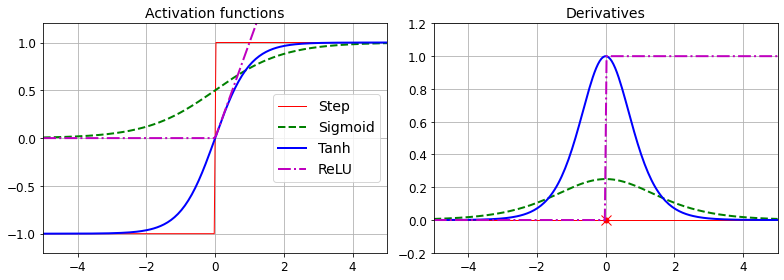

In [7]:
z = np.linspace(-5, 5, 200)

plt.figure(figsize=(11,4))

plt.subplot(121)
plt.plot(z, np.sign(z), "r-", linewidth=1, label="Step")
plt.plot(z, sigmoid(z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, np.tanh(z), "b-", linewidth=2, label="Tanh")
plt.plot(z, relu(z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
plt.legend(loc="center right", fontsize=14)
plt.title("Activation functions", fontsize=14)
plt.axis([-5, 5, -1.2, 1.2])

plt.subplot(122)
plt.plot(z, derivative(np.sign, z), "r-", linewidth=1, label="Step")
plt.plot(0, 0, "ro", markersize=5)
plt.plot(0, 0, "rx", markersize=10)
plt.plot(z, derivative(sigmoid, z), "g--", linewidth=2, label="Sigmoid")
plt.plot(z, derivative(np.tanh, z), "b-", linewidth=2, label="Tanh")
plt.plot(z, derivative(relu, z), "m-.", linewidth=2, label="ReLU")
plt.grid(True)
#plt.legend(loc="center right", fontsize=14)
plt.title("Derivatives", fontsize=14)
plt.axis([-5, 5, -0.2, 1.2])

save_fig("activation_functions_plot")
plt.show()


In [8]:
def heaviside(z):
    return (z >= 0).astype(z.dtype)

def mlp_xor(x1, x2, activation=heaviside):
    return activation(-activation(x1 + x2 - 1.5) + activation(x1 + x2 - 0.5) - 0.5)

Text(0.5, 1.0, 'Activation function: sigmoid')

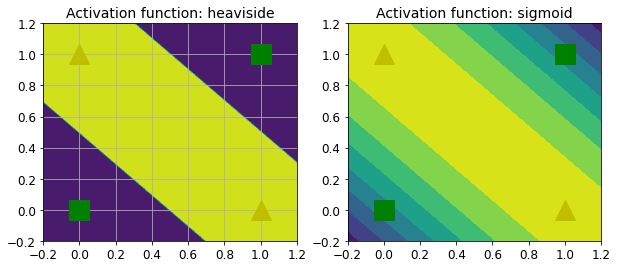

In [9]:
x1s = np.linspace(-0.2, 1.2, 100)
x2s = np.linspace(-0.2, 1.2, 100)
x1, x2 = np.meshgrid(x1s, x2s)

z1 = mlp_xor(x1, x2, activation=heaviside)
z2 = mlp_xor(x1, x2, activation=sigmoid)

plt.figure(figsize=(10,4))

plt.subplot(121)
plt.contourf(x1, x2, z1)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: heaviside", fontsize=14)
plt.grid(True)

plt.subplot(122)
plt.contourf(x1, x2, z2)
plt.plot([0, 1], [0, 1], "gs", markersize=20)
plt.plot([0, 1], [1, 0], "y^", markersize=20)
plt.title("Activation function: sigmoid", fontsize=14)

Building an Image Classifier

First let's import TensorFlow and Keras.

In [3]:
import tensorflow as tf
from tensorflow import keras

In [4]:
tf.__version__

'2.8.0'

In [12]:
keras.__version__

'2.8.0'

Let's start by loading the fashion MNIST dataset. Keras has a number of functions to load popular datasets in keras.datasets. The dataset is already split for you between a training set and a test set, but it can be useful to split the training set further to have a validation set:

In [8]:
fashion_mnist = keras.datasets.fashion_mnist
(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()

The training set contains 60,000 grayscale images, each 28x28 pixels:

In [14]:
X_train_full.shape

(60000, 28, 28)

In [15]:
X_test.shape

(10000, 28, 28)

In [16]:
y_train_full.shape

(60000,)

In [17]:
y_test.shape

(10000,)

Each pixel intensity is represented as a byte (0 to 255):

In [14]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255.

In [9]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

You can plot an image using Matplotlib's imshow() function, with a 'binary' color map:

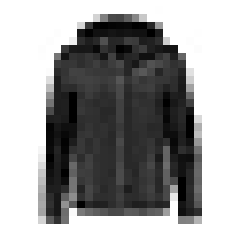

In [10]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9:

In [17]:
y_train

array([4, 0, 7, ..., 3, 0, 5], dtype=uint8)

In [11]:
#Here are the corresponding class names:

class_names = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
               "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [19]:
X_valid.shape


(5000, 28, 28)

In [20]:
X_test.shape

(10000, 28, 28)

In [25]:
class_names[y_train[54900]]

'T-shirt/top'

Saving figure fashion_mnist_plot


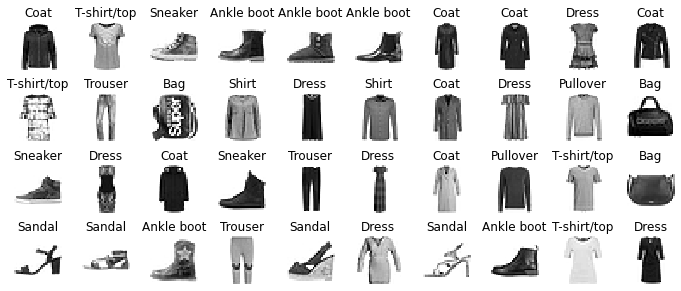

In [12]:
#Let's take a look at a sample of the images in the dataset:

n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(class_names[y_train[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_plot', tight_layout=False)
plt.show()

Creating the Model Using the Sequential API

In [22]:
#Now let’s build the neural network! Here is a classification MLP with two hidden layers:

model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=[28 , 28]))
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(10, activation="softmax"))

In [23]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 300)               235500    
                                                                 
 dense_1 (Dense)             (None, 100)               30100     
                                                                 
 dense_2 (Dense)             (None, 10)                1010      
                                                                 
Total params: 266,610
Trainable params: 266,610
Non-trainable params: 0
_________________________________________________________________


In [24]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [25]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [26]:
model.layers

In [27]:
model.layers[1].name

'dense'

In [28]:
model.get_layer('dense_1').name

'dense_1'

In [29]:
hidden1 = model.layers[1]
hidden1.name

'dense'

In [40]:
model.get_layer(hidden1.name) is hidden1

True

In [30]:
weights, biases = hidden1.get_weights()

In [31]:
weights

array([[ 0.02448617, -0.00877795, -0.02189048, ..., -0.02766046,
         0.03859074, -0.06889391],
       [ 0.00476504, -0.03105379, -0.0586676 , ...,  0.00602964,
        -0.02763776, -0.04165364],
       [-0.06189284, -0.06901957,  0.07102345, ..., -0.04238207,
         0.07121518, -0.07331658],
       ...,
       [-0.03048757,  0.02155137, -0.05400612, ..., -0.00113463,
         0.00228987,  0.05581069],
       [ 0.07061854, -0.06960931,  0.07038955, ..., -0.00384101,
         0.00034875,  0.02878492],
       [-0.06022581,  0.01577859, -0.02585464, ..., -0.00527829,
         0.00272203, -0.06793761]], dtype=float32)

In [32]:
weights.shape

(784, 300)

In [33]:
biases

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0.

In [34]:
biases.shape

(300,)

Compiling the Model

In [35]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer="sgd",
             metrics=["accuracy"])

Training and Evaluating the Model

In [36]:
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid)
                   )

Epoch 1/30
1719/1719 [==============================] - 11s 5ms/step - loss: 0.7237 - accuracy: 0.7644 - val_loss: 0.5207 - val_accuracy: 0.8234
Epoch 2/30
1719/1719 [==============================] - 5s 3ms/step - loss: 0.4843 - accuracy: 0.8318 - val_loss: 0.4345 - val_accuracy: 0.8538
Epoch 3/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4393 - accuracy: 0.8454 - val_loss: 0.5330 - val_accuracy: 0.7980
Epoch 4/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.4125 - accuracy: 0.8569 - val_loss: 0.3915 - val_accuracy: 0.8644
Epoch 5/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3940 - accuracy: 0.8619 - val_loss: 0.3748 - val_accuracy: 0.8690
Epoch 6/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.3752 - accuracy: 0.8674 - val_loss: 0.3707 - val_accuracy: 0.8722
Epoch 7/30
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3633 - accuracy: 0.8714 - val_loss: 0.3627 - val_accuracy

In [37]:
history.params

{'verbose': 1, 'epochs': 30, 'steps': 1719}

In [38]:
print(history.epoch)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29]


In [39]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

Saving figure keras_learning_curves_plot


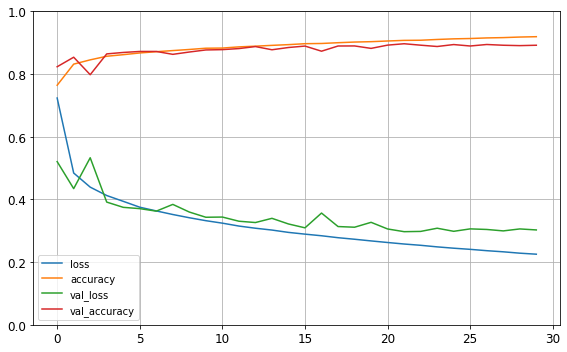

In [40]:
import pandas as pd

pd.DataFrame(history.history).plot(figsize=(8,5))
plt.grid(True)
plt.gca().set_ylim(0,1)
save_fig("keras_learning_curves_plot")
plt.show()

In [41]:
model.evaluate(X_test, y_test)

313/313 [==============================] - 0s 1ms/step - loss: 0.3361 - accuracy: 0.8834


[0.3360535800457001, 0.883400022983551]

Using the Model to Make Predictions

In [42]:
X_new = X_test[:3]
y_proba = model.predict(X_new)
y_proba.round(2)

array([[0.  , 0.  , 0.  , 0.  , 0.  , 0.01, 0.  , 0.03, 0.  , 0.96],
       [0.  , 0.  , 0.99, 0.  , 0.01, 0.  , 0.  , 0.  , 0.  , 0.  ],
       [0.  , 1.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.  ]],
      dtype=float32)

Warning: model.predict_classes(X_new) is deprecated. It is replaced with np.argmax(model.predict(X_new), axis=-1).

In [43]:
#y_pred = model.predict_classes(X_new) is deprecated
y_pred = np.argmax(model.predict(X_new), axis=-1)
y_pred

array([9, 2, 1], dtype=int64)

In [44]:
np.array(class_names)[y_pred]

array(['Ankle boot', 'Pullover', 'Trouser'], dtype='<U11')

In [45]:
y_new = y_test[:3]
y_new

array([9, 2, 1], dtype=uint8)

And the classifier actually classified all three images correctly:

Saving figure fashion_mnist_images_plot


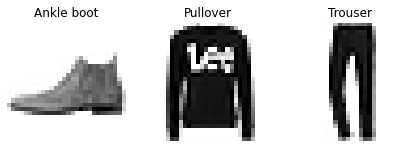

In [46]:
plt.figure(figsize=(7.2, 2.4))
for index, image in enumerate(X_new):
    plt.subplot(1, 3, index + 1)
    plt.imshow(image, cmap="binary", interpolation="nearest")
    plt.axis('off')
    plt.title(class_names[y_test[index]], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
save_fig('fashion_mnist_images_plot', tight_layout=False)
plt.show()

Building a Regression MLP Using the Sequential API

Regression MLP

Let's load, split and scale the California housing dataset (the original one, not the modified one as in chapter 2):

In [10]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

housing = fetch_california_housing()

X_train_full , X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [11]:
np.random.seed(42)
tf.random.set_seed(42)

In [12]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(1)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 2s 1ms/step - loss: 1.6419 - val_loss: 0.8560
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7047 - val_loss: 0.6531
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6345 - val_loss: 0.6099
Epoch 4/20
363/363 [==============================] - 0s 890us/step - loss: 0.5977 - val_loss: 0.5658
Epoch 5/20
363/363 [==============================] - 0s 925us/step - loss: 0.5706 - val_loss: 0.5355
Epoch 6/20
363/363 [==============================] - 0s 913us/step - loss: 0.5472 - val_loss: 0.5173
Epoch 7/20
363/363 [==============================] - 0s 917us/step - loss: 0.5288 - val_loss: 0.5081
Epoch 8/20
363/363 [==============================] - 0s 903us/step - loss: 0.5130 - val_loss: 0.4799
Epoch 9/20
363/363 [==============================] - 0s 958us/step - loss: 0.4992 - val_loss: 0.4690
Epoch 10/20
363/363 [==============================] - 0s 970us/step - loss: 0.4875 - va

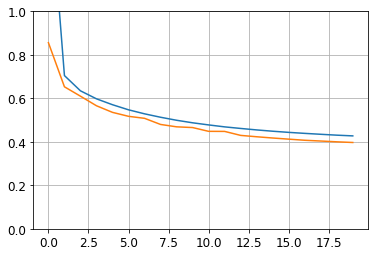

In [50]:
plt.plot(pd.DataFrame(history.history))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [51]:
y_pred

array([[0.38856643],
       [1.6792021 ],
       [3.1022794 ]], dtype=float32)

Functional API

Not all neural network models are simply sequential. Some may have complex topologies. Some may have multiple inputs and/or multiple outputs. For example, a Wide & Deep neural network (see paper) connects all or part of the inputs directly to the output layer.

In [52]:
np.random.seed(42)
tf.random.set_seed(42)

In [53]:
input_ = keras.layers.Input(shape=X_train.shape[1:])
hidden1 = keras.layers.Dense(30, activation="relu")(input_)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_, hidden2])
output = keras.layers.Dense(1)(concat)
model = keras.models.Model(inputs=[input_], outputs=[output])

In [54]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 8)]          0           []                               
                                                                                                  
 dense_5 (Dense)                (None, 30)           270         ['input_1[0][0]']                
                                                                                                  
 dense_6 (Dense)                (None, 30)           930         ['dense_5[0][0]']                
                                                                                                  
 concatenate (Concatenate)      (None, 38)           0           ['input_1[0][0]',                
                                                                  'dense_6[0][0]']            

Once you have built the Keras model, everything is exactly like earlier, so no need to repeat it here: you must compile the model, train it, evaluate it and use it to make predictions.

In [55]:
#compile the model
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
#train the model
history = model.fit(X_train, y_train, epochs=20, validation_data=(X_valid, y_valid))
#evaluate the model
mse_test = model.evaluate(X_test, y_test)
#make the prediccions
X_new = X_test[:3]
y_pred = model.predict(X_new)

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 1.2611 - val_loss: 3.3940
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6580 - val_loss: 0.9360
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5878 - val_loss: 0.5649
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 0.5712
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5347 - val_loss: 0.5045
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5158 - val_loss: 0.4831
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5002 - val_loss: 0.4639
Epoch 8/20
363/363 [==============================] - 0s 998us/step - loss: 0.4876 - val_loss: 0.4638
Epoch 9/20
363/363 [==============================] - 0s 983us/step - loss: 0.4760 - val_loss: 0.4421
Epoch 10/20
363/363 [==============================] - 0s 969us/step - loss: 0.4659 - val_loss: 

What if you want to send different subsets of input features through the wide or deep paths? We will send 5 features (features 0 to 4), and 6 through the deep path (features 2 to 7). Note that 3 features will go through both (features 2, 3 and 4).

In [56]:
np.random.seed(42)
tf.random.set_seed(42)

In [13]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="output")(concat)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output])

In [14]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

X_train_A, X_train_B = X_train[:, :5], X_train[:, 2:]
X_valid_A, X_valid_B = X_valid[:, :5], X_valid[:, 2:]
X_test_A, X_test_B = X_test[:, :5], X_test[:, 2:]
X_new_A, X_new_B = X_test_A[:3], X_test_B[:3]

history = model.fit((X_train_A, X_train_B), y_train, epochs=20,
                    validation_data=((X_valid_A, X_valid_B), y_valid))
mse_test = model.evaluate((X_test_A, X_test_B), y_test)
y_pred = model.predict((X_new_A, X_new_B))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.2622 - val_loss: 0.8088
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7076 - val_loss: 0.6408
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6205 - val_loss: 0.5704
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5843 - val_loss: 0.5613
Epoch 5/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5605 - val_loss: 0.5309
Epoch 6/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5409 - val_loss: 0.5067
Epoch 7/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5248 - val_loss: 0.4905
Epoch 8/20
363/363 [==============================] - 0s 1ms/step - loss: 0.5110 - val_loss: 0.4846
Epoch 9/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4982 - val_loss: 0.4718
Epoch 10/20
363/363 [==============================] - 0s 1ms/step - loss: 0.4873 - val_loss: 0.4557

Adding an auxiliary output for regularization:

In [72]:
np.random.seed(42)
tf.random.set_seed(42)

In [73]:
input_A = keras.layers.Input(shape=[5], name="wide_input")
input_B = keras.layers.Input(shape=[6], name="deep_input")
hidden1 = keras.layers.Dense(30, activation="relu")(input_B)
hidden2 = keras.layers.Dense(30, activation="relu")(hidden1)
concat = keras.layers.concatenate([input_A, hidden2])
output = keras.layers.Dense(1, name="main_output")(concat)
aux_output = keras.layers.Dense(1)(hidden2)
model = keras.models.Model(inputs=[input_A, input_B], outputs=[output, aux_output])

In [74]:
model.compile(loss=["mse", "mse"], loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [75]:
history = model.fit([X_train_A, X_train_B], [y_train, y_train], epochs=20,
                   validation_data=([X_valid_A, X_valid_B], [y_valid, y_valid]))

Epoch 1/20
363/363 [==============================] - 1s 1ms/step - loss: 2.1365 - main_output_loss: 1.9196 - dense_23_loss: 4.0890 - val_loss: 1.6233 - val_main_output_loss: 0.8468 - val_dense_23_loss: 8.6117
Epoch 2/20
363/363 [==============================] - 0s 1ms/step - loss: 0.8905 - main_output_loss: 0.6969 - dense_23_loss: 2.6326 - val_loss: 1.5163 - val_main_output_loss: 0.6836 - val_dense_23_loss: 9.0109
Epoch 3/20
363/363 [==============================] - 0s 1ms/step - loss: 0.7429 - main_output_loss: 0.6088 - dense_23_loss: 1.9499 - val_loss: 1.4639 - val_main_output_loss: 0.6229 - val_dense_23_loss: 9.0326
Epoch 4/20
363/363 [==============================] - 0s 1ms/step - loss: 0.6771 - main_output_loss: 0.5691 - dense_23_loss: 1.6485 - val_loss: 1.3388 - val_main_output_loss: 0.5481 - val_dense_23_loss: 8.4552
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.6381 - main_output_loss: 0.5434 - dense_23_loss: 1.4911 - val_loss: 1.2177 - val_mai

In [76]:
total_loss, main_loss, aux_loss = model.evaluate(
    [X_test_A, X_test_B], [y_test, y_test])
y_pred_main, y_pred_aux = model.predict([X_new_A, X_new_B])

162/162 [==============================] - 0s 828us/step - loss: 0.4668 - main_output_loss: 0.4178 - dense_23_loss: 0.9082


The subclassing API

In [15]:
class WideAndDeepModel(keras.models.Model):
    def __init__(self, units=30, activation="relu", **kwargs):
        super().__init__(**kwargs)
        self.hidden1 = keras.layers.Dense(units, activation=activation)
        self.hidden2 = keras.layers.Dense(units, activation=activation)
        self.main_output = keras.layers.Dense(1)
        self.aux_output = keras.layers.Dense(1)
        
    def call(self, inputs):
        input_A, input_B = inputs
        hidden1 = self.hidden1(input_B)
        hidden2 = self.hidden2(hidden1)
        concat = keras.layers.concatenate([input_A, hidden2])
        main_output = self.main_output(concat)
        aux_output = self.aux_output(hidden2)
        return main_output, aux_output

model = WideAndDeepModel(30, activation="relu")     

In [78]:
model.compile(loss="mse", loss_weights=[0.9, 0.1], optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit((X_train_A, X_train_B), (y_train, y_train), epochs=10,
                    validation_data=((X_valid_A, X_valid_B), (y_valid, y_valid)))
total_loss, main_loss, aux_loss = model.evaluate((X_test_A, X_test_B), (y_test, y_test))
y_pred_main, y_pred_aux = model.predict((X_new_A, X_new_B))

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 2.3298 - output_1_loss: 2.2186 - output_2_loss: 3.3304 - val_loss: 2.1435 - val_output_1_loss: 1.1581 - val_output_2_loss: 11.0117
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 0.9714 - output_1_loss: 0.8543 - output_2_loss: 2.0252 - val_loss: 1.7567 - val_output_1_loss: 0.8205 - val_output_2_loss: 10.1825
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.8268 - output_1_loss: 0.7289 - output_2_loss: 1.7082 - val_loss: 1.5664 - val_output_1_loss: 0.7913 - val_output_2_loss: 8.5419
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7636 - output_1_loss: 0.6764 - output_2_loss: 1.5477 - val_loss: 1.3088 - val_output_1_loss: 0.6549 - val_output_2_loss: 7.1933
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.7211 - output_1_loss: 0.6402 - output_2_loss: 1.4489 - val_loss: 1.1357 - val_output_1_loss: 0.5964 - val_

Saving and Restoring a Model

In [79]:
np.random.seed(42)
tf.random.set_seed(42)

In [80]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [81]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
history = model.fit(X_train, y_train, epochs=30, validation_data=(X_valid, y_valid))
mse_test = model.evaluate(X_test, y_test)

Epoch 1/30
363/363 [==============================] - 1s 1ms/step - loss: 3.1968 - val_loss: 2.8335
Epoch 2/30
363/363 [==============================] - 0s 958us/step - loss: 1.0456 - val_loss: 0.9996
Epoch 3/30
363/363 [==============================] - 0s 947us/step - loss: 0.6442 - val_loss: 0.5676
Epoch 4/30
363/363 [==============================] - 0s 1ms/step - loss: 0.5467 - val_loss: 0.5344
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5120 - val_loss: 0.4726
Epoch 6/30
363/363 [==============================] - 0s 979us/step - loss: 0.4861 - val_loss: 0.4653
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.4678 - val_loss: 0.4305
Epoch 8/30
363/363 [==============================] - 0s 871us/step - loss: 0.4526 - val_loss: 0.4245
Epoch 9/30
363/363 [==============================] - 0s 928us/step - loss: 0.4406 - val_loss: 0.4197
Epoch 10/30
363/363 [==============================] - 0s 854us/step - loss: 0.4315 - val_

In [82]:
model.save("my_keras_model.h5")

In [83]:
model = keras.models.load_model("my_keras_model.h5")

In [84]:
model.predict(X_new)

array([[0.73772454],
       [1.9149928 ],
       [3.834859  ]], dtype=float32)

In [85]:
model.save_weights("my_keras_weights.ckpt")

In [86]:
model.load_weights("my_keras_weights.ckpt")

Using Callbacks during Training


In [87]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [88]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(10, activation="relu"),
    keras.layers.Dense(1)
])

In [89]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_keras_model.h5", save_best_only=True)
history = model.fit(X_train, y_train, epochs=10, validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb])
model = keras.models.load_model("my_keras_model.h5") #rollback the best model
mse_test = model.evaluate(X_test, y_test)

Epoch 1/10
363/363 [==============================] - 1s 1ms/step - loss: 3.1968 - val_loss: 2.8335
Epoch 2/10
363/363 [==============================] - 0s 1ms/step - loss: 1.0456 - val_loss: 0.9996
Epoch 3/10
363/363 [==============================] - 0s 1ms/step - loss: 0.6442 - val_loss: 0.5676
Epoch 4/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5467 - val_loss: 0.5344
Epoch 5/10
363/363 [==============================] - 0s 1ms/step - loss: 0.5120 - val_loss: 0.4726
Epoch 6/10
363/363 [==============================] - 0s 996us/step - loss: 0.4861 - val_loss: 0.4653
Epoch 7/10
363/363 [==============================] - 0s 968us/step - loss: 0.4678 - val_loss: 0.4305
Epoch 8/10
363/363 [==============================] - 0s 1ms/step - loss: 0.4526 - val_loss: 0.4245
Epoch 9/10
363/363 [==============================] - 0s 999us/step - loss: 0.4406 - val_loss: 0.4197
Epoch 10/10
162/162 [==============================] - 0s 666us/step - loss: 0.4300


 EarlyStopping callback

In [90]:
model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))
early_stopping_cb = keras.callbacks.EarlyStopping(patience=10,
                                                 restore_best_weights=True)
history = model.fit(X_train, y_train, epochs=100,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb])
mse_test = model.evaluate(X_test, y_test)

Epoch 1/100
363/363 [==============================] - 1s 3ms/step - loss: 0.4242 - val_loss: 0.3990
Epoch 2/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4184 - val_loss: 0.4404
Epoch 3/100
363/363 [==============================] - 0s 952us/step - loss: 0.4137 - val_loss: 0.4128
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4090 - val_loss: 0.4058
Epoch 5/100
363/363 [==============================] - 1s 2ms/step - loss: 0.4062 - val_loss: 0.3839
Epoch 6/100
363/363 [==============================] - 0s 976us/step - loss: 0.4023 - val_loss: 0.4406
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4007 - val_loss: 0.3809
Epoch 8/100
363/363 [==============================] - 1s 1ms/step - loss: 0.3981 - val_loss: 0.3731
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3956 - val_loss: 0.4136
Epoch 10/100
363/363 [==============================] - 0s 962us/step - loss: 0.3938 - 

If you need extra control, you can easily write your own custom callbacks. For example, the following custom callback will display the ratio between the validation loss and the training loss during training (e.g., to detect overfitting):

In [92]:
class PrintValTrainRatioCallback(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        print("\nval/train: {:.2f}".format(logs["val_loss"] / logs["loss"]))

In [93]:
val_train_ratio_cb = PrintValTrainRatioCallback()
history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[val_train_ratio_cb])

326/363 [=========================>....] - ETA: 0s - loss: 0.3809
val/train: 1.03
363/363 [==============================] - 1s 1ms/step - loss: 0.3822 - val_loss: 0.3934


TensorBoard

In [17]:
root_logdir = os.path.join(os.curdir, "my_logs")


In [18]:
def get_run_logdir():
    import time
    run_id = time.strftime("run_%Y_%m_%d-%H_%M_%S")
    return os.path.join(root_logdir, run_id)

run_logdir = get_run_logdir()
run_logdir

'.\\my_logs\\run_2022_03_30-10_54_51'

Next, the good news is that Keras provides a nice TensorBoard callback:

In [96]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [98]:
 # Build and compile your model

model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1e-3))

In [100]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 1.8542 - val_loss: 1.3779
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 0.7854 - val_loss: 0.6885
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.6817 - val_loss: 0.6645
Epoch 4/30
363/363 [==============================] - 1s 3ms/step - loss: 0.6283 - val_loss: 0.5944
Epoch 5/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5868 - val_loss: 0.5505
Epoch 6/30
363/363 [==============================] - 1s 3ms/step - loss: 0.5510 - val_loss: 0.5211
Epoch 7/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5225 - val_loss: 0.5055
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4993 - val_loss: 0.4648
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4803 - val_loss: 0.4442
Epoch 10/30
363/363 [==============================] - 1s 2ms/step - loss: 0.4649 - val_loss: 0.4304

To start the TensorBoard server, one option is to open a terminal, if needed activate the virtualenv where you installed TensorBoard, go to this notebook's directory, then type:

$ tensorboard --logdir=./my_logs --port=6006

You can then open your web browser to localhost:6006 and use TensorBoard. Once you are done, press Ctrl-C in the terminal window, this will shutdown the TensorBoard server.

Alternatively, you can load TensorBoard's Jupyter extension and run it like this:

In [109]:
%load_ext tensorboard
%tensorboard --logdir=./my_logs --port=6006

The tensorboard extension is already loaded. To reload it, use:
  %reload_ext tensorboard


Reusing TensorBoard on port 6006 (pid 25188), started 0:16:23 ago. (Use '!kill 25188' to kill it.)

In [103]:
run_logdir2 = get_run_logdir()
run_logdir2

'.\\my_logs\\run_2022_03_29-17_01_53'

In [104]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [107]:
model = keras.models.Sequential([
    keras.layers.Dense(30, activation="relu", input_shape=[8]),
    keras.layers.Dense(30, activation="relu"),
    keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=0.05))

In [108]:
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir2)
history = model.fit(X_train, y_train, epochs=30,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, tensorboard_cb])

Epoch 1/30
363/363 [==============================] - 1s 2ms/step - loss: 0.5530 - val_loss: 302.8466
Epoch 2/30
363/363 [==============================] - 1s 2ms/step - loss: 63.6669 - val_loss: 0.9735
Epoch 3/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9411 - val_loss: 0.9599
Epoch 4/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9197 - val_loss: 0.8464
Epoch 5/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9819 - val_loss: 0.9281
Epoch 6/30
363/363 [==============================] - 1s 1ms/step - loss: 0.9240 - val_loss: 0.9089
Epoch 7/30
363/363 [==============================] - 0s 1ms/step - loss: 0.9179 - val_loss: 0.8815
Epoch 8/30
363/363 [==============================] - 1s 2ms/step - loss: 0.8950 - val_loss: 0.9007
Epoch 9/30
363/363 [==============================] - 1s 2ms/step - loss: 0.9150 - val_loss: 0.8734
Epoch 10/30
363/363 [==============================] - 1s 1ms/step - loss: 0.8921 - val_loss: 0.8

Hyperparameter Tuning

 we need to wrap our Keras models in objects that mimic regular Scikit-Learn regressors. The first step is to create a function that will build and compile a Keras model, given a set of hyperparameters:

In [5]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [6]:
def build_model(n_hidden=1, n_neurons=30, learning_rate=3e-3, input_shape=[8]):
    model = keras.models.Sequential()
    model.add(keras.layers.InputLayer(input_shape=input_shape))
    for layer in range(n_hidden):
        model.add(keras.layers.Dense(n_neurons, activation="relu"))
    model.add(keras.layers.Dense(1))
    optimizer = keras.optimizers.SGD(learning_rate=learning_rate)
    model.compile(loss="mse", optimizer=optimizer)
    return model

Next, let’s create a KerasRegressor based on this build_model() function:

In [8]:
from scikeras.wrappers import KerasRegressor, KerasClassifier

In [9]:
keras_rg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\andre\AppData\Local\Temp/ipykernel_18768/265907141.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_rg = tf.keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [17]:
from scikeras.wrappers import KerasRegressor
from scikeras.wrappers import KerasClassifier

In [125]:
pip install scikeras --user

Note: you may need to restart the kernel to use updated packages.


In [20]:
keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)

C:\Users\andre\AppData\Local\Temp/ipykernel_18768/1709004121.py:1: DeprecationWarning: KerasRegressor is deprecated, use Sci-Keras (https://github.com/adriangb/scikeras) instead. See https://www.adriangb.com/scikeras/stable/migration.html for help migrating.
  keras_reg = keras.wrappers.scikit_learn.KerasRegressor(build_model)


In [21]:
keras_reg.fit(X_train, y_train, epochs=100,
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.1415 - val_loss: 1.9696
Epoch 2/100
363/363 [==============================] - 0s 1ms/step - loss: 0.5958 - val_loss: 3.3564
Epoch 3/100
363/363 [==============================] - 1s 2ms/step - loss: 0.5666 - val_loss: 2.3866
Epoch 4/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4776 - val_loss: 0.9450
Epoch 5/100
363/363 [==============================] - 0s 960us/step - loss: 0.4452 - val_loss: 0.8425
Epoch 6/100
363/363 [==============================] - 0s 944us/step - loss: 0.4246 - val_loss: 0.4375
Epoch 7/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4114 - val_loss: 0.4463
Epoch 8/100
363/363 [==============================] - 0s 998us/step - loss: 0.4032 - val_loss: 0.4134
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3973 - val_loss: 0.3955
Epoch 10/100
363/363 [==============================] - 0s 929us/step - loss: 0.3931 

In [22]:
mse_test = keras_reg.score(X_test, y_test)

162/162 [==============================] - 0s 871us/step - loss: 0.3604


In [23]:
y_pred = keras_reg.predict(X_new)

In [24]:
keras_reg2 = KerasRegressor(build_model, )

In [25]:
keras_reg2.fit(X_train, y_train, epochs=100, 
              validation_data=(X_valid, y_valid),
              callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Epoch 1/100
363/363 [==============================] - 1s 1ms/step - loss: 1.4901 - val_loss: 59.6889
Epoch 2/100
363/363 [==============================] - 0s 919us/step - loss: 1.0909 - val_loss: 0.5356
Epoch 3/100
363/363 [==============================] - 0s 967us/step - loss: 0.5441 - val_loss: 0.4837
Epoch 4/100
363/363 [==============================] - 0s 943us/step - loss: 0.4990 - val_loss: 0.4598
Epoch 5/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4765 - val_loss: 0.4264
Epoch 6/100
363/363 [==============================] - 0s 941us/step - loss: 0.4545 - val_loss: 0.4162
Epoch 7/100
363/363 [==============================] - 0s 944us/step - loss: 0.4452 - val_loss: 0.4020
Epoch 8/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4346 - val_loss: 0.3972
Epoch 9/100
363/363 [==============================] - 0s 1ms/step - loss: 0.4258 - val_loss: 0.3973
Epoch 10/100
363/363 [==============================] - 0s 978us/step - loss: 0.

363/363 [==============================] - 0s 917us/step - loss: 0.3478 - val_loss: 0.4102
Epoch 81/100
363/363 [==============================] - 0s 898us/step - loss: 0.3480 - val_loss: 0.3551
Epoch 82/100
363/363 [==============================] - 0s 911us/step - loss: 0.3468 - val_loss: 0.3330
Epoch 83/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3478 - val_loss: 0.3405
Epoch 84/100
363/363 [==============================] - 0s 938us/step - loss: 0.3462 - val_loss: 0.3897
Epoch 85/100
363/363 [==============================] - 0s 929us/step - loss: 0.3462 - val_loss: 0.3846
Epoch 86/100
363/363 [==============================] - 0s 918us/step - loss: 0.3461 - val_loss: 0.3295
Epoch 87/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3460 - val_loss: 0.3874
Epoch 88/100
363/363 [==============================] - 0s 1ms/step - loss: 0.3458 - val_loss: 0.3834
Epoch 89/100
363/363 [==============================] - 0s 969us/step - loss: 0.345

KerasRegressor(
	model=<function build_model at 0x000001ECAF675160>
	build_fn=None
	warm_start=False
	random_state=None
	optimizer=rmsprop
	loss=None
	metrics=None
	batch_size=None
	validation_batch_size=None
	verbose=1
	callbacks=None
	validation_split=0.0
	shuffle=True
	run_eagerly=False
	epochs=1
)

 we do not actually want to train and evaluate a single model like this, we want to train hundreds of variants and see which one performs best on the validation set. Since there are many hyperparameters, it is preferable to use a randomized search rather than grid search (as we discussed in Chapter 2). Let’s try to explore the number of hidden layers, the number of neurons and the learning rate:

Warning: the following cell crashes at the end of training. This seems to be caused by Keras issue #13586, which was triggered by a recent change in Scikit-Learn. Pull Request #13598 seems to fix the issue, so this problem should be resolved soon. In the meantime, I've added .tolist() and .rvs(1000).tolist() as workarounds.

In [26]:
np.random.seed(42)
tf.random.set_seed(42)

In [30]:
from scipy.stats import reciprocal
from sklearn.model_selection import RandomizedSearchCV

param_distribs = {
    "n_hidden": [0,1,2,3],
    "n_neurons": np.arange(1 , 100)               .tolist(),
    "learning_rate": reciprocal(3e-4, 3e-2)       .rvs(1000).tolist(),
}

rnd_search_cv = RandomizedSearchCV(keras_reg, param_distribs, n_iter=10, cv=3, verbose=2)
rnd_search_cv.fit(X_train, y_train, epochs=100,
                 validation_data=(X_valid, y_valid),
                 callbacks=[keras.callbacks.EarlyStopping(patience=10)])

Fitting 3 folds for each of 10 candidates, totalling 30 fits
Epoch 1/100
242/242 [==============================] - 2s 2ms/step - loss: 2.9138 - val_loss: 2.4002
Epoch 2/100
242/242 [==============================] - 0s 1ms/step - loss: 1.0455 - val_loss: 0.8872
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7886 - val_loss: 0.7174
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.7167 - val_loss: 0.6633
Epoch 5/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6789 - val_loss: 0.6331
Epoch 6/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6507 - val_loss: 0.6025
Epoch 7/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6259 - val_loss: 0.5773
Epoch 8/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6041 - val_loss: 0.5639
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5830 - val_loss: 0.5594
Epoch 10/100
242/242 [========

242/242 [==============================] - 0s 1ms/step - loss: 0.6349 - val_loss: 0.5978
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6252 - val_loss: 0.5876
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6158 - val_loss: 0.5771
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6066 - val_loss: 0.5676
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5976 - val_loss: 0.5579
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5892 - val_loss: 0.5496
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5810 - val_loss: 0.5421
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5731 - val_loss: 0.5342
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5655 - val_loss: 0.5273
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5582 - val_loss: 

Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6097 - val_loss: 0.5869
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.6036 - val_loss: 0.5792
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5977 - val_loss: 0.5767
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5919 - val_loss: 0.5773
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5865 - val_loss: 0.5831
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5812 - val_loss: 0.5930
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5760 - val_loss: 0.6048
Epoch 33/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5711 - val_loss: 0.6194
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5663 - val_loss: 0.6327
Epoch 35/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5616

Epoch 67/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4582 - val_loss: 0.4626
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4569 - val_loss: 0.4630
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4557 - val_loss: 0.4629
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4545 - val_loss: 0.4619
Epoch 71/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4534 - val_loss: 0.4612
Epoch 72/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4523 - val_loss: 0.4613
Epoch 73/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4512 - val_loss: 0.4602
Epoch 74/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4501 - val_loss: 0.4619
Epoch 75/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4491 - val_loss: 0.4631
Epoch 76/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4481

Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3623 - val_loss: 0.3392
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3595 - val_loss: 0.3403
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3591 - val_loss: 0.3380
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3585 - val_loss: 0.3563
Epoch 29/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3605 - val_loss: 0.3414
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3561 - val_loss: 0.3487
Epoch 31/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3531 - val_loss: 0.3471
Epoch 32/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3523 - val_loss: 0.3439
Epoch 33/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3500 - val_loss: 0.3456
Epoch 34/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3483

242/242 [==============================] - 0s 1ms/step - loss: 0.4159 - val_loss: 0.3875
Epoch 97/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4153 - val_loss: 0.3862
Epoch 98/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4147 - val_loss: 0.3854
Epoch 99/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4140 - val_loss: 0.3877
Epoch 100/100
121/121 [==============================] - 0s 636us/step - loss: 0.4181
[CV] END learning_rate=0.00044072844796206717, n_hidden=1, n_neurons=41; total time=  29.2s
Epoch 1/100
242/242 [==============================] - 0s 1ms/step - loss: 3.8204 - val_loss: 3.7946
Epoch 2/100
242/242 [==============================] - 0s 995us/step - loss: 1.8987 - val_loss: 4.7733
Epoch 3/100
242/242 [==============================] - 0s 1ms/step - loss: 1.2481 - val_loss: 4.8183
Epoch 4/100
242/242 [==============================] - 0s 1ms/step - loss: 0.9976 - val_loss: 4.1489
Epoch 5/100
242/242 [

Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4321 - val_loss: 0.4012
Epoch 18/100
242/242 [==============================] - 0s 998us/step - loss: 0.4301 - val_loss: 0.3991
Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4281 - val_loss: 0.3985
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4268 - val_loss: 0.3964
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4252 - val_loss: 0.3962
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4241 - val_loss: 0.3945
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4227 - val_loss: 0.3930
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4212 - val_loss: 0.3942
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4210 - val_loss: 0.3930
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.41

242/242 [==============================] - 0s 1ms/step - loss: 0.4038 - val_loss: 0.3781
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4033 - val_loss: 0.3782
Epoch 63/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4029 - val_loss: 0.3771
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4022 - val_loss: 0.3764
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4020 - val_loss: 0.3761
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4011 - val_loss: 0.3765
Epoch 67/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4009 - val_loss: 0.3753
Epoch 68/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4006 - val_loss: 0.3749
Epoch 69/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4000 - val_loss: 0.3753
Epoch 70/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3997 - val_loss: 

Epoch 40/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4345 - val_loss: 0.4020
Epoch 41/100
242/242 [==============================] - 1s 2ms/step - loss: 0.4340 - val_loss: 0.4021
Epoch 42/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.4014
Epoch 43/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4335 - val_loss: 0.4007
Epoch 44/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4326 - val_loss: 0.4013
Epoch 45/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4327 - val_loss: 0.4008
Epoch 46/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4318 - val_loss: 0.4006
Epoch 47/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4321 - val_loss: 0.3992
Epoch 48/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4316 - val_loss: 0.3993
Epoch 49/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4313

Epoch 19/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.4095
Epoch 20/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4286 - val_loss: 0.4062
Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4247 - val_loss: 0.4028
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4212 - val_loss: 0.4001
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4186 - val_loss: 0.3994
Epoch 24/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4164 - val_loss: 0.3958
Epoch 25/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4144 - val_loss: 0.3944
Epoch 26/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4128 - val_loss: 0.3931
Epoch 27/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4110 - val_loss: 0.3923
Epoch 28/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4097

Epoch 78/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4332 - val_loss: 0.3922
Epoch 79/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4333 - val_loss: 0.3906
Epoch 80/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4330 - val_loss: 0.3910
Epoch 81/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4332 - val_loss: 0.3902
Epoch 82/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4331 - val_loss: 0.3894
Epoch 83/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4342 - val_loss: 0.3900
Epoch 84/100
242/242 [==============================] - 0s 2ms/step - loss: 0.4326 - val_loss: 0.3899
Epoch 85/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4324 - val_loss: 0.3892
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4324 - val_loss: 0.3898
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4323

Epoch 57/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3983 - val_loss: 0.3743
Epoch 58/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3972 - val_loss: 0.3761
Epoch 59/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3963 - val_loss: 0.3714
Epoch 60/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3953 - val_loss: 0.3725
Epoch 61/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3945 - val_loss: 0.3716
Epoch 62/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3935 - val_loss: 0.3738
Epoch 63/100
242/242 [==============================] - 0s 2ms/step - loss: 0.3926 - val_loss: 0.3701
Epoch 64/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3917 - val_loss: 0.3751
Epoch 65/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3909 - val_loss: 0.3735
Epoch 66/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3902

Epoch 8/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5651 - val_loss: 0.5608
Epoch 9/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5456 - val_loss: 0.5594
Epoch 10/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5285 - val_loss: 0.5090
Epoch 11/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5132 - val_loss: 0.4823
Epoch 12/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5000 - val_loss: 0.4891
Epoch 13/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4880 - val_loss: 0.4714
Epoch 14/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4774 - val_loss: 0.4840
Epoch 15/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4682 - val_loss: 0.4916
Epoch 16/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4600 - val_loss: 0.4455
Epoch 17/100
242/242 [==============================] - 0s 1ms/step - loss: 0.4526 -

242/242 [==============================] - 0s 1ms/step - loss: 0.3652 - val_loss: 0.3518
Epoch 86/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3648 - val_loss: 0.3676
Epoch 87/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3641 - val_loss: 0.3991
Epoch 88/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3643 - val_loss: 0.3454
Epoch 89/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3633 - val_loss: 0.3956
Epoch 90/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3633 - val_loss: 0.3427
Epoch 91/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3624 - val_loss: 0.3930
Epoch 92/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3630 - val_loss: 0.3581
Epoch 93/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3620 - val_loss: 0.4284
Epoch 94/100
242/242 [==============================] - 0s 1ms/step - loss: 0.3622 - val_loss: 

Epoch 21/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5355 - val_loss: 0.5862
Epoch 22/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5417 - val_loss: 0.4928
Epoch 23/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5423 - val_loss: 1.2524
Epoch 24/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5341 - val_loss: 0.6593
Epoch 25/100
242/242 [==============================] - 0s 972us/step - loss: 0.5450 - val_loss: 1.1337
Epoch 26/100
242/242 [==============================] - 0s 944us/step - loss: 0.5367 - val_loss: 1.0218
Epoch 27/100
242/242 [==============================] - 0s 2ms/step - loss: 0.5218 - val_loss: 3.2453
Epoch 28/100
242/242 [==============================] - 0s 974us/step - loss: 0.5850 - val_loss: 2.3339
Epoch 29/100
242/242 [==============================] - 0s 1ms/step - loss: 0.5330 - val_loss: 3.7975
Epoch 30/100
242/242 [==============================] - 0s 1ms/step - loss: 

RandomizedSearchCV(cv=3,
                   estimator=<keras.wrappers.scikit_learn.KerasRegressor object at 0x000001ECB2A42FA0>,
                   param_distributions={'learning_rate': [0.006645493585437878,
                                                          0.011762077837801909,
                                                          0.0009507296807064935,
                                                          0.00533174602616718,
                                                          0.004174584161081818,
                                                          0.013892551272765091,
                                                          0.019466836248271807,
                                                          0.00031727422918941597,
                                                          0.006685918723390747,
                                                          0.00038088410836...
                                                          0.00111850493

In [31]:
rnd_search_cv.best_params_

{'n_neurons': 17, 'n_hidden': 2, 'learning_rate': 0.006316693893387373}

In [32]:
rnd_search_cv.best_score_

-0.3672727545102437

In [33]:
rnd_search_cv.best_estimator_

In [34]:
rnd_search_cv.score(X_test, y_test)

162/162 [==============================] - 0s 859us/step - loss: 0.3174


-0.3173729181289673

In [35]:
model = rnd_search_cv.best_estimator_.model

In [36]:
model

In [37]:
model.evaluate(X_test, y_test)

162/162 [==============================] - 0s 838us/step - loss: 0.3174


0.3173729181289673

Exercise: Train a deep MLP on the MNIST dataset (you can load it using keras.datasets.mnist.load_data(). See if you can get over 98% precision. Try searching for the optimal learning rate by using the approach presented in this chapter (i.e., by growing the learning rate exponentially, plotting the loss, and finding the point where the loss shoots up). Try adding all the bells and whistles—save checkpoints, use early stopping, and plot learning curves using TensorBoard.

Let's load the dataset:

In [38]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.mnist.load_data()

11501568/11490434 [==============================] - 3s 0us/step


Just like for the Fashion MNIST dataset, the MNIST training set contains 60,000 grayscale images, each 28x28 pixels:

In [39]:
X_train_full.shape

(60000, 28, 28)

Each pixel intensity is also represented as a byte (0 to 255):

In [40]:
X_train_full.dtype

dtype('uint8')

Let's split the full training set into a validation set and a (smaller) training set. We also scale the pixel intensities down to the 0-1 range and convert them to floats, by dividing by 255, just like we did for Fashion MNIST:

In [41]:
X_valid, X_train = X_train_full[:5000] / 255., X_train_full[5000:] / 255.
y_valid, y_train = y_train_full[:5000], y_train_full[5000:]
X_test = X_test / 255.

Let's plot an image using Matplotlib's imshow() function, with a 'binary' color map:

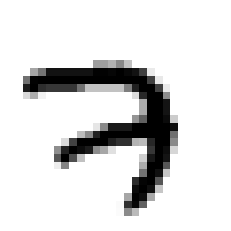

In [42]:
plt.imshow(X_train[0], cmap="binary")
plt.axis("off")
plt.show()

The labels are the class IDs (represented as uint8), from 0 to 9. Conveniently, the class IDs correspond to the digits represented in the images, so we don't need a class_names array:

In [43]:
y_train

array([7, 3, 4, ..., 5, 6, 8], dtype=uint8)

The validation set contains 5,000 images, and the test set contains 10,000 images:

In [44]:
X_valid.shape

(5000, 28, 28)

In [45]:
X_test.shape

(10000, 28, 28)

In [46]:
X_train.shape

(55000, 28, 28)

Let's take a look at a sample of the images in the dataset:

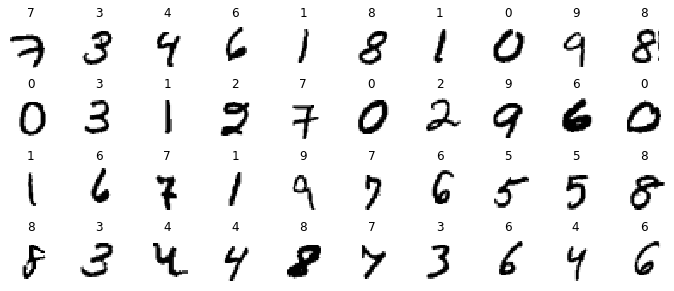

In [47]:
n_rows = 4
n_cols = 10
plt.figure(figsize=(n_cols * 1.2, n_rows * 1.2))
for row in range(n_rows):
    for col in range(n_cols):
        index = n_cols * row + col
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(X_train[index], cmap="binary", interpolation="nearest")
        plt.axis('off')
        plt.title(y_train[index], fontsize=12)
plt.subplots_adjust(wspace=0.2, hspace=0.5)
plt.show()

Let's build a simple dense network and find the optimal learning rate. We will need a callback to grow the learning rate at each iteration. It will also record the learning rate and the loss at each iteration:

In [54]:
K = keras.backend

class ExponentialLearningRate(keras.callbacks.Callback):
    def __init__(self, factor):
        self.factor = factor
        self.rates = []
        self.losses = []
    def on_batch_end(self, batch, logs):
        self.rates.append(K.get_value(self.model.optimizer.learning_rate))
        self.losses.append(logs["loss"])
        K.set_value(self.model.optimizer.learning_rate, self.model.optimizer.learning_rate * self.factor)

In [61]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [62]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28 ,28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

We will start with a small learning rate of 1e-3, and grow it by 0.5% at each iteration:

In [63]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=1e-3),
             metrics=["accuracy"])
expon_lr = ExponentialLearningRate(factor=1.005)

Now let's train the model for just 1 epoch:

In [64]:
history = model.fit(X_train, y_train, epochs=1,
                    validation_data=(X_valid, y_valid),
                    callbacks=[expon_lr])

1719/1719 [==============================] - 5s 3ms/step - loss: nan - accuracy: 0.5710 - val_loss: nan - val_accuracy: 0.0958


We can now plot the loss as a functionof the learning rate:

Text(0, 0.5, 'Loss')

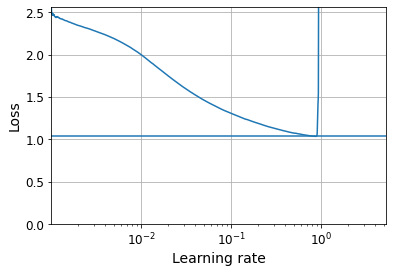

In [65]:
plt.plot(expon_lr.rates, expon_lr.losses)
plt.gca().set_xscale('log')
plt.hlines(min(expon_lr.losses), min(expon_lr.rates), max(expon_lr.rates))
plt.axis([min(expon_lr.rates), max(expon_lr.rates), 0, expon_lr.losses[0]])
plt.grid()
plt.xlabel("Learning rate")
plt.ylabel("Loss")

The loss starts shooting back up violently when the learning rate goes over 6e-1, so let's try using half of that, at 3e-1:

In [66]:
keras.backend.clear_session()
np.random.seed(42)
tf.random.set_seed(42)

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(300, activation="relu"),
    keras.layers.Dense(100, activation="relu"),
    keras.layers.Dense(10, activation="softmax")
])

In [68]:
model.compile(loss="sparse_categorical_crossentropy",
             optimizer=keras.optimizers.SGD(learning_rate=3e-1),
             metrics=["accuracy"])

In [69]:
run_index = 1 # increment this at every run
run_logdir = os.path.join(os.curdir, "my_mnist_logs", "run_{:03d}".format(run_index))
run_logdir

'.\\my_mnist_logs\\run_001'

In [70]:
early_stopping_cb = keras.callbacks.EarlyStopping(patience=20)
checkpoint_cb = keras.callbacks.ModelCheckpoint("my_mnist_model.h5", save_best_only=True)
tensorboard_cb = keras.callbacks.TensorBoard(run_logdir)

history = model.fit(X_train, y_train, epochs=1,
                   validation_data=(X_valid, y_valid),
                   callbacks=[checkpoint_cb, early_stopping_cb, tensorboard_cb])

1719/1719 [==============================] - 5s 3ms/step - loss: 0.2363 - accuracy: 0.9263 - val_loss: 0.0975 - val_accuracy: 0.9712


In [71]:
model = keras.models.load_model("my_mnist_model.h5") #rollback to best model
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0983 - accuracy: 0.9706


[0.09830770641565323, 0.9706000089645386]

We got over 98% accuracy. Finally, let's look at the learning curves using TensorBoard:

In [76]:
%reload_ext tensorboard
%tensorboard --logdir=./my_mnist_logs --port=6006